Setup

In [ ]:
!pip install PyShp
!pip install contextily
!pip install geopandas
!pip install scikit-learn
!pip install pmdarima
!pip install dbfread
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import seaborn as sns

from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

from numpy import sqrt
from sklearn.metrics import mean_squared_error

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Extração

In [ ]:
df = pd.read_csv('drive/MyDrive/TCC/dataset_ocorrencias.csv', sep=';', header=0)

<ipython-input-5-abb6d68c5246>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('drive/MyDrive/TCC/dataset_ocorrencias.csv', sep=';', header=0)


In [ ]:
inmet2017 = pd.read_csv('drive/MyDrive/TCC/INMET2017.csv', encoding='latin-1',  sep=';', header=0)

In [ ]:
inmet2018 = pd.read_csv('drive/MyDrive/TCC/INMET2018.csv', encoding='latin-1',  sep=';', header=0)

In [ ]:
inmet2019 = pd.read_csv('drive/MyDrive/TCC/INMET2019.csv', encoding='latin-1',  sep=';', header=0)

In [ ]:
inmet2020 = pd.read_csv('drive/MyDrive/TCC/INMET2020.csv', encoding='latin-1',  sep=';', header=0)

In [ ]:
inmet2021 = pd.read_csv('drive/MyDrive/TCC/INMET2021.csv', encoding='latin-1',  sep=';', header=0)

In [ ]:
inmet = pd.concat([inmet2017, inmet2018, inmet2019, inmet2020, inmet2021])

SuscetibilidadeBacias Data:
  BACIA  ID CLASSE                                           geometry
0     1   1  Baixa  POLYGON ((755070.832 6966085.42, 755103.394 69...
1     3   2   Alta  POLYGON ((757241.939 6962312.826, 757209.163 6...
2     2   3  Media  POLYGON ((754111.718 6963305.7, 754108.458 696...
3     1   4  Baixa  POLYGON ((758094.221 6962352.309, 758140.854 6...
4     2   5  Media  POLYGON ((750770.927 6963151.84, 750910.735 69...

Columns in SuscetibilidadeBacias:
Index(['BACIA', 'ID', 'CLASSE', 'geometry'], dtype='object')

SuscetibilidadeMovimentoDeMassa_UHT Data:
   UF      Municipio Classe  \
0  SC  Florianópolis   Alta   
1  SC  Florianópolis   Alta   
2  SC  Florianópolis   Alta   
3  SC  Florianópolis   Alta   
4  SC  Florianópolis   Alta   

                                            Processo  \
0  Deslizamento, corrida de massa, queda de rocha...   
1  Deslizamento, corrida de massa, queda de rocha...   
2  Deslizamento, corrida de massa, queda de rocha...   
3 

<ipython-input-18-f59312476041>:49: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right")


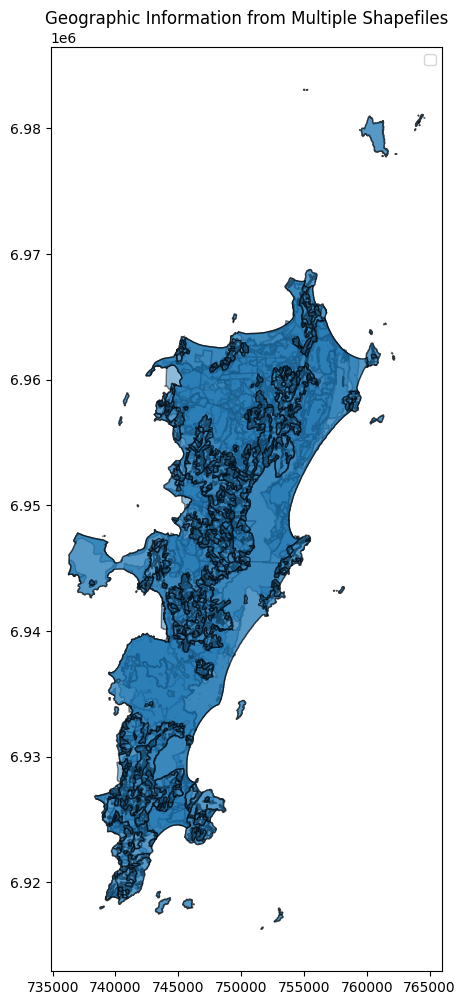

                                        BACIA   ID CLASSE  GRIDCODE  Area  \
SuscetibilidadeBacias               0       1  1.0  Baixa       NaN   NaN   
                                    1       3  2.0   Alta       NaN   NaN   
                                    2       2  3.0  Media       NaN   NaN   
                                    3       1  4.0  Baixa       NaN   NaN   
                                    4       2  5.0  Media       NaN   NaN   
...                                       ...  ...    ...       ...   ...   
SuscetibilidadeMovimentoDeMassa_UHT 457   NaN  NaN    NaN       NaN   NaN   
                                    458   NaN  NaN    NaN       NaN   NaN   
                                    459   NaN  NaN    NaN       NaN   NaN   
                                    460   NaN  NaN    NaN       NaN   NaN   
                                    461   NaN  NaN    NaN       NaN   NaN   

                                         Range  \
SuscetibilidadeBacias    

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd  # Make sure to import pandas for DataFrame operations

# List of shapefile names (without extensions)
shapefiles = [
    "SuscetibilidadeBacias",
    "SuscetibilidadeEnxurradas",
    "SuscetibilidadeInundacao",
    "SuscetibilidadeMovimentoDeMassa",
    "SuscetibilidadeMovimentoDeMassa_UHT"
]

# Path to the directory containing shapefiles
base_path = "drive/MyDrive/TCC/"  # Replace with your file path

# Dictionary to store GeoDataFrames for each shapefile
gdfs = {}

# Load each shapefile into a GeoDataFrame and store it in the dictionary
for file in shapefiles:
    file_path = f"{base_path}{file}.shp"
    gdf = gpd.read_file(file_path)
    gdfs[file] = gdf  # Store the GeoDataFrame with the filename as the key

# Display the filled columns for SuscetibilidadeBacias
print("SuscetibilidadeBacias Data:")
print(gdfs["SuscetibilidadeBacias"].head())  # Display first few rows

print("\nColumns in SuscetibilidadeBacias:")
print(gdfs["SuscetibilidadeBacias"].columns)  # List all columns

# Display the filled columns for SuscetibilidadeMovimentoDeMassa_UHT
print("\nSuscetibilidadeMovimentoDeMassa_UHT Data:")
print(gdfs["SuscetibilidadeMovimentoDeMassa_UHT"].head())  # Display first few rows

print("\nColumns in SuscetibilidadeMovimentoDeMassa_UHT:")
print(gdfs["SuscetibilidadeMovimentoDeMassa_UHT"].columns)  # List all columns

# Plotting all GeoDataFrames on the same figure
fig, ax = plt.subplots(figsize=(12, 12))

# Plot each GeoDataFrame with a unique color and label
for i, (name, gdf) in enumerate(gdfs.items()):
    gdf.plot(ax=ax, label=name, alpha=0.5, edgecolor="black")

# Add title and legend
plt.title("Geographic Information from Multiple Shapefiles")
plt.legend(loc="upper right")
plt.show()

# Optional: Combine all attribute data (non-geometric) into a single DataFrame
combined_df = pd.concat([gdf.drop(columns='geometry') for gdf in gdfs.values()], keys=gdfs.keys())
print(combined_df)


Tratamento e Preparação

In [ ]:
df['Dates'] = pd.to_datetime(df['horario']).dt.date
df['Time'] = pd.to_datetime(df['horario']).dt.time
df['Hour'] = pd.to_datetime(df['horario']).dt.hour

In [ ]:
df['Year']=  pd.to_datetime(df['horario']).dt.year
df['Month']=  pd.to_datetime(df['horario']).dt.month
df['Day']=  pd.to_datetime(df['horario']).dt.day

In [ ]:
df.loc[:,'horario'] = pd.to_datetime(df.horario)

In [ ]:
df = df.assign(
    cidade=df.cidade.astype("string"),
    obm=df.obm.astype("string"),
    vtr=df.vtr.astype("string"),
    vitima=df.vitima.astype("string")
)

In [ ]:
df = df.assign(
    populacao=df.populacao.astype('int64')
)

In [ ]:
df = df.assign(
    bc_indenizado=df.bc_indenizado.astype('bool'),
)

In [ ]:
df = df.assign(
    mtcl=df.mtcl.astype('float64'),
    lat_ocorrencia=df.lat_ocorrencia.astype('float64'),
    lon_ocorrencia=df.lon_ocorrencia.astype('float64')
)

In [ ]:
df.loc[:,'tempo_resposta'] = pd.to_timedelta(df.tempo_resposta)
df.loc[:,'tempo_total_empenho'] = pd.to_timedelta(df.tempo_total_empenho)

In [ ]:
df = df[df['coordenada_ocorrencia'].notna()]

In [ ]:
df = df.drop_duplicates('id_ocorrencia')

In [ ]:
dfFloripa = df.copy()

In [ ]:
dfFloripa = dfFloripa.query("cidade == 'Florianópolis'")

In [ ]:
dfFloripa = dfFloripa.loc[((dfFloripa.tipo == 'SALVAMENTO / BUSCA / RESGATE') & (dfFloripa.subtipo != 'SUICÍDIO/TENTATIVA') & (dfFloripa.subtipo != 'EXPLOSÃO') & (dfFloripa.subtipo != 'AFOGAMENTO') & (dfFloripa.subtipo != 'NaN')) ]

In [ ]:
df = df.loc[((df.tipo == 'SALVAMENTO / BUSCA / RESGATE') & (df.subtipo != 'SUICÍDIO/TENTATIVA') & (df.subtipo != 'EXPLOSÃO') & (df.subtipo != 'AFOGAMENTO') & (df.subtipo != 'NaN')) ]

In [ ]:
dfFloripa = dfFloripa[dfFloripa.lat_ocorrencia < -27.3]

In [ ]:
dfFloripa = dfFloripa[dfFloripa.lon_ocorrencia > -48.611]

In [ ]:
dfCopy = dfFloripa.copy()

In [ ]:
dfCopy = dfCopy.drop(columns=['cidade','populacao','horario','mtcl','vtr','obm','coordenada_obm','lat_obm','lon_obm','origem_samu','vitima','coordenada_ocorrencia','militar_bc','bc_indenizado','tempo_resposta','tempo_total_empenho','firecast'])

In [ ]:
df = df.drop(columns=['cidade','populacao','horario','mtcl','vtr','obm','coordenada_obm','lat_obm','lon_obm','origem_samu','vitima','coordenada_ocorrencia','militar_bc','bc_indenizado','tempo_resposta','tempo_total_empenho','firecast'])

In [ ]:
inmet['DatesNew'] = inmet['Dates'].fillna(inmet['Data'])

In [ ]:
inmet['Horas'] = inmet['HORA (UTC)'].str[0:2]

In [ ]:
inmet['Horas2'] = inmet['Hora UTC'].str[0:2]

In [ ]:
inmet['HorasNew'] = inmet['Horas'].fillna(inmet['Horas2'])

In [ ]:

inmet['HorasN2'] = inmet['HorasNew'].apply(lambda x: x[1] if x[0] == '0' and len(x) == 2 else x)


In [ ]:

inmet['DatesNew'] = inmet['DatesNew'].apply(lambda x: x.replace('/', '-'))


In [ ]:


inmet['DatesNew'] = inmet['DatesNew'].apply(lambda x: x[6:10] + '-' + x[3:5] + '-' + x[0:2])


In [ ]:
inmet['Radiacao'] = inmet['RADIACAO GLOBAL (KJ/m²)'].fillna(inmet['RADIACAO GLOBAL (Kj/m²)'])

In [ ]:
inmet = inmet.drop(columns=['HORA (UTC)','Hora UTC','Horas',	'Horas2',	'Dates',	'Data', 'HorasNew'])

In [ ]:
inmet = inmet.drop(columns=['RADIACAO GLOBAL (KJ/m²)','RADIACAO GLOBAL (Kj/m²)'])

In [ ]:
inmet.convert_dtypes().dtypes

,0
Dates,string[python]
HORA (UTC),string[python]
"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",string[python]
"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",string[python]
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),string[python]
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),string[python]
RADIACAO GLOBAL (KJ/m²),string[python]
"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",string[python]
TEMPERATURA DO PONTO DE ORVALHO (°C),string[python]
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),string[python]


In [ ]:
inmet = inmet.assign(
    HorasN2=inmet.HorasN2.astype('int64')
)

In [ ]:
inmet = inmet.assign(
    DatesNew=inmet.DatesNew.astype('string')
)

In [ ]:
dfCopy = dfCopy.assign(
    Dates=dfCopy.Dates.astype('string')
)

In [ ]:
df4 =  pd.merge(df4, inmet,  how='inner', left_on=['Dates', 'Hour'], right_on = ['DatesNew', 'HorasN2'])

In [ ]:
df4 = df4.assign(
    Dates=dfCopy.Dates.astype('string')
)

In [ ]:
df2 = pd.merge(dfCopy, inmet,  how='inner', left_on=['Dates', 'Hour'], right_on = ['DatesNew', 'HorasN2'])

In [ ]:
df_sorted = df.sort_values(by=['Dates', 'Time'])

In [ ]:
df2_sorted = df2.sort_values(by=['Dates', 'Time'])

In [ ]:
df3_sorted = df3.sort_values(by=['Dates', 'Time'])

In [ ]:
import pandas as pd

# Ensure 'Dates' is in datetime format
df_sorted['Dates'] = pd.to_datetime(df_sorted['Dates'])

# Convert 'Time' column to a timedelta by converting it to a string first
df_sorted['Time'] = pd.to_timedelta(df_sorted['Time'].astype(str))

# Combine 'Dates' and 'Time' into a single 'Datetime' column
df_sorted['Datetime'] = df_sorted['Dates'] + df_sorted['Time']

# Set the new 'Datetime' column as the index
df_sorted.set_index('Datetime', inplace=True)

# Optionally, drop the original 'Dates' and 'Time' columns
df_sorted.drop(columns=['Dates', 'Time'], inplace=True)

# The DataFrame is now indexed by combined date and time


In [ ]:
# Calcular a quantidade de ocorrências por data
df_quantity = df.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Quantity')

# Agora, para cada registro no DataFrame original, junte com a quantidade de ocorrências do dia
df = pd.merge(df, df_quantity[['Year', 'Month', 'Day', 'Quantity']], on=['Year', 'Month', 'Day'], how='left')


In [ ]:
# First, ensure there are no other factors affecting the grouping
# Calculate the daily occurrences count for each unique Year, Month, Day
df_quantity = dfCopy.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Quantity')

# Merge the calculated daily occurrences back into the original DataFrame
dfCopy = pd.merge(dfCopy, df_quantity, on=['Year', 'Month', 'Day'], how='left')


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# List of shapefile names (without extensions)
shapefiles = [
    "SuscetibilidadeBacias",
    "SuscetibilidadeEnxurradas",
    "SuscetibilidadeInundacao",
    "SuscetibilidadeMovimentoDeMassa",
    "SuscetibilidadeMovimentoDeMassa_UHT"
]

# Path to the directory containing shapefiles
base_path = "drive/MyDrive/TCC/"  # Replace with your file path

# Dictionary to store GeoDataFrames for each shapefile
gdfs = {}

# Load each shapefile into a GeoDataFrame and store it in the dictionary
for file in shapefiles:
    file_path = f"{base_path}{file}.shp"
    gdf = gpd.read_file(file_path)
    gdfs[file] = gdf  # Store the GeoDataFrame with the filename as the key


# Convert dfFloripa to a GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(dfFloripa['lon_ocorrencia'], dfFloripa['lat_ocorrencia'])]
gdf_floripa = gpd.GeoDataFrame(dfFloripa, geometry=geometry, crs="EPSG:4326")  # Ensure you set the correct CRS

# Initialize empty columns for Classe
dfFloripa['Classe_Bacias'] = None
dfFloripa['Classe_Movimento'] = None

# Classify points based on SuscetibilidadeBacias
for index, row in gdfs["SuscetibilidadeBacias"].iterrows():
    polygon = row.geometry
    classe = row['CLASSE']  # Adjust if the column name is different

    # Check if any point in gdf_floripa is contained in the polygon
    condition = gdf_floripa.geometry.within(polygon)

    # Assign the Classe value to dfFloripa based on the condition
    dfFloripa.loc[condition, 'Classe_Bacias'] = classe

# Classify points based on SuscetibilidadeMovimentoDeMassa_UHT
for index, row in gdfs["SuscetibilidadeMovimentoDeMassa_UHT"].iterrows():
    polygon = row.geometry
    classe = row['Classe']  # Adjust if the column name is different

    # Check if any point in gdf_floripa is contained in the polygon
    condition = gdf_floripa.geometry.within(polygon)

    # Assign the Classe value to dfFloripa based on the condition
    dfFloripa.loc[condition, 'Classe_Movimento'] = classe

# Display the updated dfFloripa
print(dfFloripa)


         id_ocorrencia         cidade  populacao              horario  \
1729          10077086  Florianópolis     500973  2017-08-03 04:00:00   
1852          10083288  Florianópolis     500973  2017-11-24 12:38:00   
1853          10082420  Florianópolis     500973  2017-11-09 15:46:00   
1855          10082354  Florianópolis     500973  2017-11-08 18:55:00   
4437          10068370  Florianópolis     500973  2017-03-04 21:53:00   
...                ...            ...        ...                  ...   
1767958       10137822  Florianópolis     500973  2021-01-13 08:36:44   
1768099       10137648  Florianópolis     500973  2021-01-09 14:54:18   
1768438       10137748  Florianópolis     500973  2021-01-11 16:09:36   
1768557       10137866  Florianópolis     500973  2021-01-14 13:31:02   
1768937       10137885  Florianópolis     500973  2021-01-14 19:55:21   

              vtr          mtcl militar_bc  bc_indenizado  \
1729       AR-118  9.213031e+06    Militar          False   
1

In [ ]:
# Transform dfFloripa to match the CRS of SuscetibilidadeBacias
gdf_floripa = gdf_floripa.to_crs(epsg=32722)

# After transforming, re-run the classification process
# Initialize empty columns for Classe
dfFloripa['Classe_Bacias'] = None
dfFloripa['Classe_Movimento'] = None

# Classify points based on SuscetibilidadeBacias
for index, row in gdfs["SuscetibilidadeBacias"].iterrows():
    polygon = row.geometry
    classe = row['CLASSE']  # Adjust if the column name is different

    # Check if any point in gdf_floripa is contained in the polygon
    condition = gdf_floripa.geometry.within(polygon)

    # Print how many points were found within the polygon
    if condition.any():
        print(f"Found {condition.sum()} points in {classe}")

    # Assign the Classe value to dfFloripa based on the condition
    dfFloripa.loc[condition, 'Classe_Bacias'] = classe

# Classify points based on SuscetibilidadeMovimentoDeMassa_UHT
for index, row in gdfs["SuscetibilidadeMovimentoDeMassa_UHT"].iterrows():
    polygon = row.geometry
    classe = row['Classe']  # Adjust if the column name is different

    # Check if any point in gdf_floripa is contained in the polygon
    condition = gdf_floripa.geometry.within(polygon)

    # Print how many points were found within the polygon
    if condition.any():
        print(f"Found {condition.sum()} points in {classe}")

    # Assign the Classe value to dfFloripa based on the condition
    dfFloripa.loc[condition, 'Classe_Movimento'] = classe

# Display the updated dfFloripa
print(dfFloripa[['lat_ocorrencia', 'lon_ocorrencia', 'Classe_Bacias', 'Classe_Movimento']])


Found 7 points in Baixa
Found 14 points in Alta
Found 5 points in Media
Found 2 points in Baixa
Found 7 points in Media
Found 7 points in Media
Found 4 points in Media
Found 11 points in Alta
Found 9 points in Alta
Found 1 points in Baixa
Found 1 points in Media
Found 24 points in Alta
Found 1 points in Alta
Found 1 points in Baixa
Found 8 points in Alta
Found 16 points in Media
Found 13 points in Baixa
Found 2 points in Media
Found 20 points in Alta
Found 29 points in Baixa
Found 10 points in Baixa
Found 22 points in Baixa
Found 2 points in Media
Found 55 points in Alta
Found 17 points in Baixa
Found 6 points in Baixa
Found 3 points in Baixa
Found 5 points in Media
Found 3 points in Baixa
Found 4 points in Alta
Found 2 points in Baixa
Found 12 points in Alta
Found 2 points in Alta
Found 10 points in Alta
Found 2 points in Alta
Found 4 points in Alta
Found 1 points in Media
Found 3 points in Alta
Found 1 points in Baixa
Found 2 points in Alta
Found 1 points in Alta
Found 4 points in Al

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Transform dfFloripa to match the CRS of SuscetibilidadeBacias
gdf_floripa = gdf_floripa.to_crs(epsg=32722)

# Initialize empty columns for Classe
dfFloripa['Classe_Bacias'] = None
dfFloripa['Classe_Movimento'] = None

# Classify points based on SuscetibilidadeBacias
for index, row in gdfs["SuscetibilidadeBacias"].iterrows():
    polygon = row.geometry
    classe = row['CLASSE']

    # Check if any point in gdf_floripa is contained in the polygon
    condition = gdf_floripa.geometry.within(polygon)

    # Print how many points were found within the polygon
    if condition.any():
        print(f"Found {condition.sum()} points in {classe}")

    # Assign the Classe value to dfFloripa based on the condition
    dfFloripa.loc[condition, 'Classe_Bacias'] = classe

# Classify points based on SuscetibilidadeMovimentoDeMassa_UHT
for index, row in gdfs["SuscetibilidadeMovimentoDeMassa_UHT"].iterrows():
    polygon = row.geometry
    classe = row['Classe']

    # Check if any point in gdf_floripa is contained in the polygon
    condition = gdf_floripa.geometry.within(polygon)

    # Print how many points were found within the polygon
    if condition.any():
        print(f"Found {condition.sum()} points in {classe}")

    # Assign the Classe value to dfFloripa based on the condition
    dfFloripa.loc[condition, 'Classe_Movimento'] = classe

# Now fill None values with the closest non-None class
def fill_closest_class(row):
    point = Point(row['Projected_X'], row['Projected_Y'])  # Ensure these columns exist
    classe_bacias = row['Classe_Bacias']
    classe_movimento = row['Classe_Movimento']

    if pd.isnull(classe_bacias):
        # Find the closest polygon in SuscetibilidadeBacias
        distances = gdfs["SuscetibilidadeBacias"].geometry.distance(point)
        valid_classes = gdfs["SuscetibilidadeBacias"].loc[gdfs["SuscetibilidadeBacias"]['CLASSE'].notnull()]
        valid_distances = distances[valid_classes.index]

        if not valid_distances.empty:
            closest_idx = valid_distances.idxmin()
            classe_bacias = gdfs["SuscetibilidadeBacias"].loc[closest_idx]['CLASSE']

    if pd.isnull(classe_movimento):
        # Find the closest polygon in SuscetibilidadeMovimentoDeMassa_UHT
        distances = gdfs["SuscetibilidadeMovimentoDeMassa_UHT"].geometry.distance(point)
        valid_classes = gdfs["SuscetibilidadeMovimentoDeMassa_UHT"].loc[gdfs["SuscetibilidadeMovimentoDeMassa_UHT"]['Classe'].notnull()]
        valid_distances = distances[valid_classes.index]

        if not valid_distances.empty:
            closest_idx = valid_distances.idxmin()
            classe_movimento = gdfs["SuscetibilidadeMovimentoDeMassa_UHT"].loc[closest_idx]['Classe']

    return pd.Series([classe_bacias, classe_movimento])  # Return a Series

# Apply the function to fill in None values
dfFloripa[['Classe_Bacias', 'Classe_Movimento']] = dfFloripa.apply(fill_closest_class, axis=1)

# Display the updated dfFloripa
print(dfFloripa[['lat_ocorrencia', 'lon_ocorrencia', 'Classe_Bacias', 'Classe_Movimento']])


Found 7 points in Baixa
Found 14 points in Alta
Found 5 points in Media
Found 2 points in Baixa
Found 7 points in Media
Found 7 points in Media
Found 4 points in Media
Found 11 points in Alta
Found 9 points in Alta
Found 1 points in Baixa
Found 1 points in Media
Found 24 points in Alta
Found 1 points in Alta
Found 1 points in Baixa
Found 8 points in Alta
Found 16 points in Media
Found 13 points in Baixa
Found 2 points in Media
Found 20 points in Alta
Found 29 points in Baixa
Found 10 points in Baixa
Found 22 points in Baixa
Found 2 points in Media
Found 55 points in Alta
Found 17 points in Baixa
Found 6 points in Baixa
Found 3 points in Baixa
Found 5 points in Media
Found 3 points in Baixa
Found 4 points in Alta
Found 2 points in Baixa
Found 12 points in Alta
Found 2 points in Alta
Found 10 points in Alta
Found 2 points in Alta
Found 4 points in Alta
Found 1 points in Media
Found 3 points in Alta
Found 1 points in Baixa
Found 2 points in Alta
Found 1 points in Alta
Found 4 points in Al

In [ ]:


# Drop the specified columns
dfFloripa = dfFloripa.drop(columns=['Projected_X', 'Projected_Y', 'Classe_Suscetibilidade'])

# Display the updated dfFloripa
dfFloripa

,id_ocorrencia,cidade,populacao,horario,vtr,mtcl,militar_bc,bc_indenizado,obm,coordenada_obm,...,origem_samu,vitima,Dates,Time,Hour,Year,Month,Day,Classe_Bacias,Classe_Movimento
1729,10077086,Florianópolis,500973,2017-08-03 04:00:00,AR-118,9.213031e+06,Militar,False,1|8105,1|8105,...,NaN,<NA>,2017-08-03,04:00:00,4,2017,8,3,Alta,Baixa
1852,10083288,Florianópolis,500973,2017-11-24 12:38:00,ABTR-116,9.305165e+06,Militar,False,2ºPEL/2ªCBM/1ºBBM - TRINDADE,"[-48.5200024,-27.5876052]",...,NaN,<NA>,2017-11-24,12:38:00,12,2017,11,24,Baixa,Baixa
1853,10082420,Florianópolis,500973,2017-11-09 15:46:00,ABTR-116,9.232818e+06,Militar,False,2ºPEL/2ªCBM/1ºBBM - TRINDADE,"[-48.5200024,-27.5876052]",...,NaN,<NA>,2017-11-09,15:46:00,15,2017,11,9,Alta,Baixa
1855,10082354,Florianópolis,500973,2017-11-08 18:55:00,ABTR-116,9.184430e+06,Militar,False,2ºPEL/2ªCBM/1ºBBM - TRINDADE,"[-48.5200024,-27.5876052]",...,NaN,<NA>,2017-11-08,18:55:00,18,2017,11,8,Alta,Baixa
4437,10068370,Florianópolis,500973,2017-03-04 21:53:00,ABT-059,9.232818e+06,Militar,False,1º/2ª/1º BBM - GBS,"[-48.5630772,-27.5922913]",...,NaN,<NA>,2017-03-04,21:53:00,21,2017,3,4,Baixa,Alta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767958,10137822,Florianópolis,500973,2021-01-13 08:36:44,ABS-006,6.100104e+06,Militar,False,2ºGBM/2ªPEL/2ªCBM/1º BBM - BARRA DA LAGOA,"[-48.4333134,-27.5749765]",...,NaN,<NA>,2021-01-13,08:36:44,8,2021,1,13,Alta,Baixa
1768099,10137648,Florianópolis,500973,2021-01-09 14:54:18,ABS-006,9.993541e+06,Militar,False,2ºGBM/2ªPEL/2ªCBM/1º BBM - BARRA DA LAGOA,"[-48.4333134,-27.5749765]",...,NaN,<NA>,2021-01-09,14:54:18,14,2021,1,9,Baixa,Baixa
1768438,10137748,Florianópolis,500973,2021-01-11 16:09:36,ABTR-66,6.118397e+10,BC,True,2ºPEL/2ªCBM/1ºBBM - TRINDADE,"[-48.5200024,-27.5876052]",...,NaN,<NA>,2021-01-11,16:09:36,16,2021,1,11,Baixa,Baixa
1768557,10137866,Florianópolis,500973,2021-01-14 13:31:02,ABTR-140,6.098100e+06,Militar,False,1ºGBM/1ºPEL/1ªCBM/1ºBBM - RIO TAVARES,"[-48.5046816,-27.6696182]",...,NaN,<NA>,2021-01-14,13:31:02,13,2021,1,14,Alta,Baixa


Treinamento e Avaliação

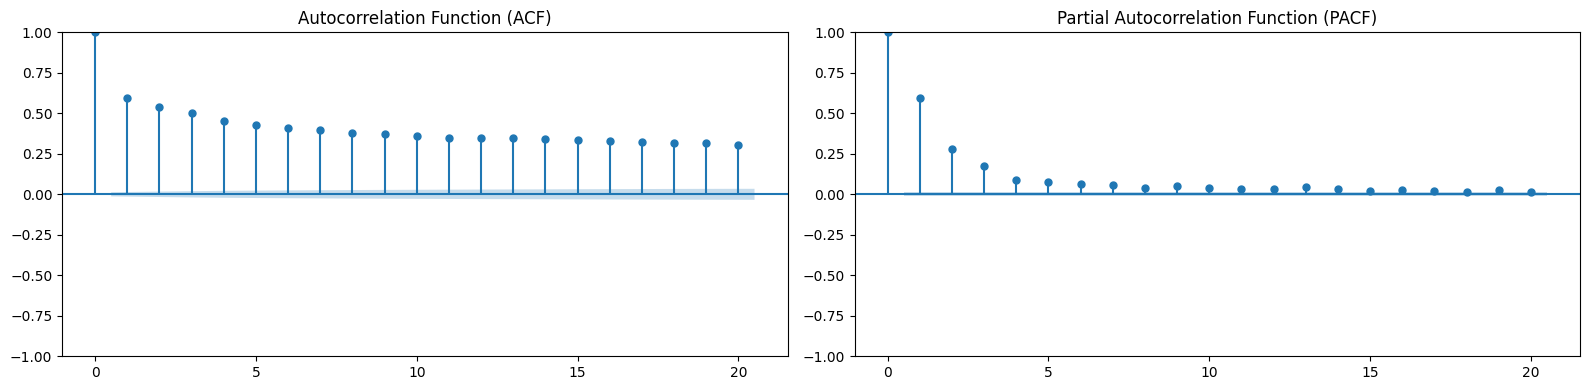

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Plot the ACF
plot_acf(df['Quantity'], lags=20, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot the PACF
plot_pacf(df['Quantity'], lags=20, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

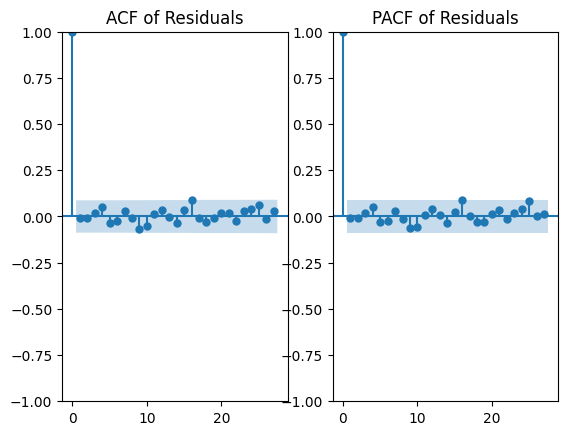

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

residuals = model_fit.resid()
plt.figure()
plt.subplot(121)
plot_acf(residuals, ax=plt.gca(), title="ACF of Residuals")
plt.subplot(122)
plot_pacf(residuals, ax=plt.gca(), title="PACF of Residuals")
plt.show()


In [ ]:
# Teste de estacionariedade (ADF)
result = adfuller(df['Quantity'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Se o p-value for maior que 0.05, a série não é estacionária e precisa ser diferenciada
if result[1] > 0.05:
    print("Série não estacionária. Realizando diferenciação.")
    df['Quantity_diff'] = df['Quantity'].diff().dropna()
    df = df.dropna()  # Remover valores NaN após a diferenciação
else:
    print("Série já é estacionária.")


ADF Statistic: -12.418585973076638
p-value: 4.1862547204222425e-23
Série já é estacionária.


EXPERIMENTO 1

ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error: 1.0799807460856634
Root Mean Squared Error: 1.0392212209561849
Mean Absolute Error: 0.7877994118093652
Mean Absolute Percentage Error: 0.24015835909466038
Best (p, d, q): (1, 1, 2)


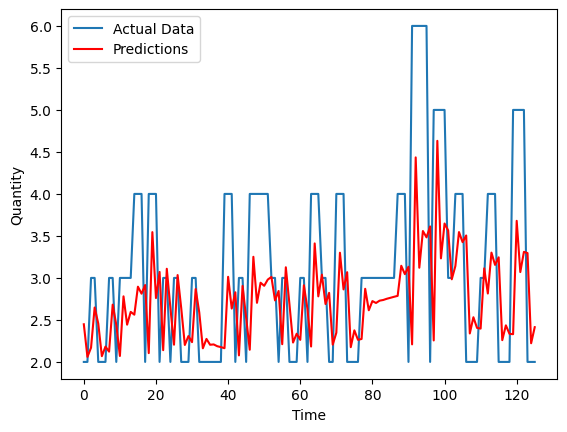

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox
import pmdarima as pm


# Dividir em treino e teste
train_data, test_data = train_test_split(df_sorted['Quantity'], test_size=0.2, shuffle=False)

#train_data_transformed = np.log1p(train_data)  # log(1 + x) to handle 0 values
#test_data_transformed = np.log1p(test_data)

# If you want to use Box-Cox transformation instead:
train_data_transformed, lmbda = boxcox(train_data + 1)  # Adding 1 to avoid issues with zero values
test_data_transformed = boxcox(test_data + 1, lmbda)

# Initialize history with the transformed training data
history = [x for x in train_data_transformed]
predictions = []

# Automatically discover the best p, d, q values using transformed data
#auto_model = pm.auto_arima(train_data_transformed, start_p=1, start_q=1, max_p=5, max_q=5, d=0, seasonal=False, stepwise=True)
p, d, q = (1,1,2)#auto_model.order  # Extract best p, d, q parameters from Auto-ARIMA

# Perform rolling forecast
for t in range(len(test_data_transformed)):
    # Fit the ARIMA model on the rolling history
    model = ARIMA(history, order=(p, d, q))
    model_fit = model.fit()

    # Make the forecast for the next time step
    yhat = model_fit.forecast()[0]

    # Store the prediction
    predictions.append(yhat)

    # Add the true observation from test_data_transformed to history (rolling update)
    history.append(test_data_transformed[t])

# Convert predictions to a numpy array
predictions = np.array(predictions)

# Inverse the transformation (log to original scale)
#predictions = np.expm1(predictions)  # Inverse log(1+x) -> exp(x)-1
#test_data_original = np.expm1(test_data_transformed)

# If using Box-Cox:
predictions = (predictions * lmbda + 1) ** (1 / lmbda)
test_data_original = (test_data_transformed * lmbda + 1) ** (1 / lmbda)

# Evaluate the performance
mse = mean_squared_error(test_data_original, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_original, predictions)
mape = mean_absolute_percentage_error(test_data_original, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"Best (p, d, q): {p, d, q}")

# Plot predictions vs actual values
plt.plot(test_data_original, label='Actual Data')
plt.plot(predictions, label='Predictions', color='red')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.legend()
plt.show()


RNN

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0451 - val_loss: 0.0371
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - val_loss: 0.0369
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - val_loss: 0.0356
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0237 - val_loss: 0.0355
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0239 - val_loss: 0.0362
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - val_loss: 0.0346
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0232 - val_loss: 0.0348
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - val_loss: 0.0338
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - val_loss: 0.0328
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - val_loss: 0.0339
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - val_loss: 0.0345
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - val_loss: 0.0335

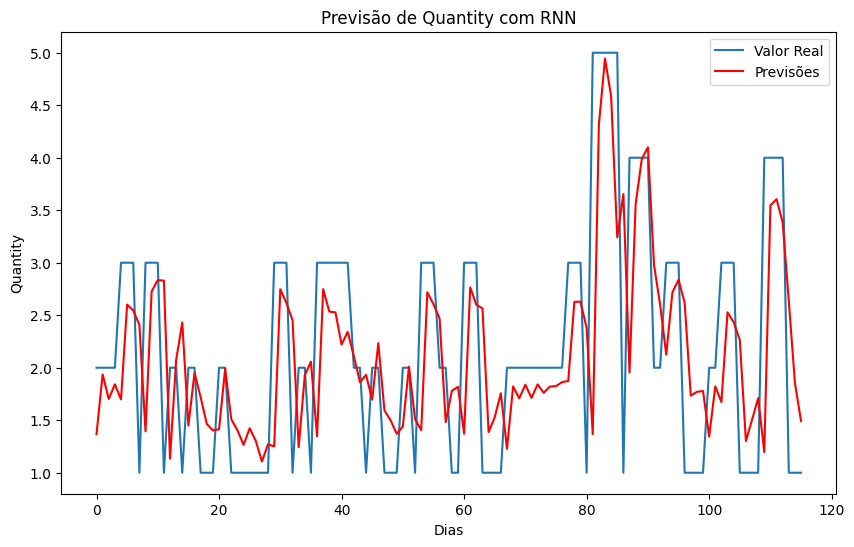

Mean Squared Error: 0.8377132537942734
Root Mean Squared Error: 0.9152667664644409
Mean Absolute Error: 0.6751245455495243
Mean Absolute Percentage Error: 0.4156983697380143


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt


# Escalonamento da coluna 'Quantity' (normalização para o intervalo [0, 1])
scaler = MinMaxScaler(feature_range=(0, 1))
df_sorted['Quantity_scaled'] = scaler.fit_transform(df_sorted[['Quantity']])

# 2. Criação de janelas de tempo
time_step = 10  # Número de passos de tempo a serem considerados para a predição

# Função para criar o dataset com janelas de tempo
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# Dividir em treino e teste
train_data, test_data = train_test_split(df_sorted['Quantity_scaled'], test_size=0.2, shuffle=False)

# Criar datasets de treinamento e teste
X_train, y_train = create_dataset(train_data.values, time_step)
X_test, y_test = create_dataset(test_data.values, time_step)

# Reformatar para o formato esperado pelo RNN (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Adicionando a dimensão 'features'
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 3. Criação do Modelo RNN
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(time_step, 1)))  # RNN com 50 unidades
model.add(Dense(1))  # Camada de saída com 1 unidade (previsão para o próximo valor)

# 4. Compilação do Modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Treinamento do Modelo
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# 6. Realizando previsões
predictions = model.predict(X_test)

# Inversão da transformação para retornar ao valor original da 'Quantity'
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# 7. Avaliação do Modelo
# Plotando a previsão vs o valor real
plt.figure(figsize=(10,6))
plt.plot(y_test_original, label='Valor Real')
plt.plot(predictions, label='Previsões', color='red')
plt.title('Previsão de Quantity com RNN')
plt.xlabel('Dias')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# 8. Cálculo das métricas de desempenho
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_original, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, predictions)
mape = mean_absolute_percentage_error(y_test_original, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")



LSTM

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0518
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0424
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0328
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0279
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0179
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0081
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.2316e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


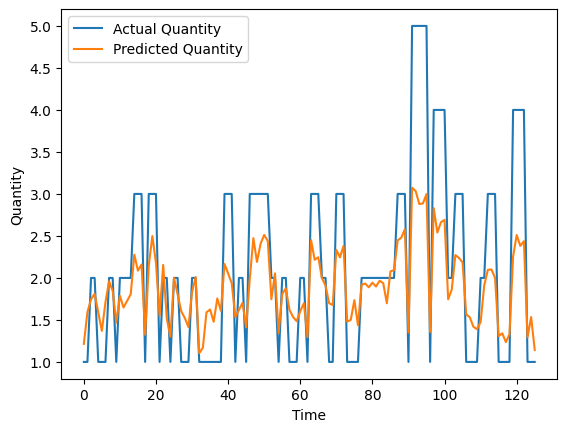

Mean Squared Error: 0.5364685110730867
Root Mean Squared Error: 0.732440107498959
Mean Absolute Error: 0.5662553584764874
Mean Absolute Percentage Error: 0.28792905968333055


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 1. Data Preparation

# Handle categorical string columns by converting them to numeric (One-Hot Encoding)
df_encoded = pd.get_dummies(df_sorted, drop_first=True)  # Converts strings to one-hot and drops the first category to avoid multicollinearity

# Extract all columns except 'Quantity' as features
features = df_encoded.drop('Quantity', axis=1).values

# Extract 'Quantity' as the target variable
target_variable = df_encoded['Quantity'].values

# Scale the features and the target separately
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(features)

scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler_target.fit_transform(target_variable.reshape(-1, 1))

# Split the data into train and test sets (80% train, 20% test)
train_size = int(len(scaled_target) * 0.8)
train_features, test_features = scaled_features[0:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[0:train_size], scaled_target[train_size:]

# Reshape the data to be 3D for LSTM (samples, time steps, features)
train_features = np.reshape(train_features, (train_features.shape[0], 1, train_features.shape[1]))
test_features = np.reshape(test_features, (test_features.shape[0], 1, test_features.shape[1]))

# 2. Model Building

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_features.shape[1], train_features.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer with 1 unit (predicting 'Quantity')

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 3. Model Training

# Train the model
history = model.fit(train_features, train_target, epochs=10, batch_size=32)

# 4. Prediction and Evaluation

# Predict the test set
predictions = model.predict(test_features)

# Inverse transform the predictions and the test data to get the original scale
predictions = scaler_target.inverse_transform(predictions)
test_target = scaler_target.inverse_transform(test_target)

# Plot the predictions and actual test data
plt.plot(test_target, label='Actual Quantity')
plt.plot(predictions, label='Predicted Quantity')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# 5. Evaluation Metrics
mse = mean_squared_error(test_data_original, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_original, predictions)
mape = mean_absolute_percentage_error(test_data_original, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

EXPERIMENTO 2

ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error: 1.0799807460856634
Root Mean Squared Error: 1.0392212209561849
Mean Absolute Error: 0.7877994118093652
Mean Absolute Percentage Error: 0.24015835909466038
Best (p, d, q): (1, 1, 2)


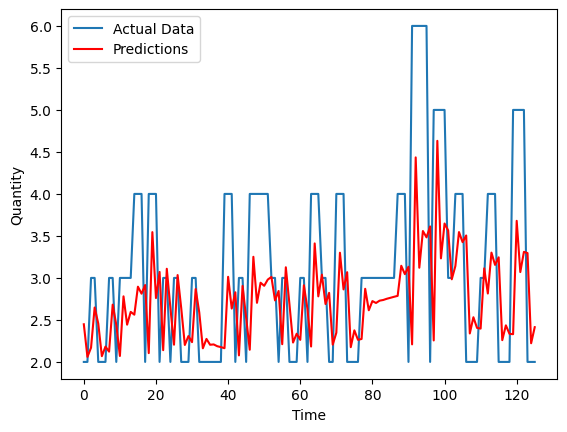

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox
import pmdarima as pm


# Dividir em treino e teste
train_data, test_data = train_test_split(df2_sorted['Quantity'], test_size=0.2, shuffle=False)

#train_data_transformed = np.log1p(train_data)  # log(1 + x) to handle 0 values
#test_data_transformed = np.log1p(test_data)

# If you want to use Box-Cox transformation instead:
train_data_transformed, lmbda = boxcox(train_data + 1)  # Adding 1 to avoid issues with zero values
test_data_transformed = boxcox(test_data + 1, lmbda)

# Initialize history with the transformed training data
history = [x for x in train_data_transformed]
predictions = []

# Automatically discover the best p, d, q values using transformed data
#auto_model = pm.auto_arima(train_data_transformed, start_p=1, start_q=1, max_p=5, max_q=5, d=0, seasonal=False, stepwise=True)
p, d, q = (1,1,2)#auto_model.order  # Extract best p, d, q parameters from Auto-ARIMA

# Perform rolling forecast
for t in range(len(test_data_transformed)):
    # Fit the ARIMA model on the rolling history
    model = ARIMA(history, order=(p, d, q))
    model_fit = model.fit()

    # Make the forecast for the next time step
    yhat = model_fit.forecast()[0]

    # Store the prediction
    predictions.append(yhat)

    # Add the true observation from test_data_transformed to history (rolling update)
    history.append(test_data_transformed[t])

# Convert predictions to a numpy array
predictions = np.array(predictions)

# Inverse the transformation (log to original scale)
#predictions = np.expm1(predictions)  # Inverse log(1+x) -> exp(x)-1
#test_data_original = np.expm1(test_data_transformed)

# If using Box-Cox:
predictions = (predictions * lmbda + 1) ** (1 / lmbda)
test_data_original = (test_data_transformed * lmbda + 1) ** (1 / lmbda)

# Evaluate the performance
mse = mean_squared_error(test_data_original, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_original, predictions)
mape = mean_absolute_percentage_error(test_data_original, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"Best (p, d, q): {p, d, q}")

# Plot predictions vs actual values
plt.plot(test_data_original, label='Actual Data')
plt.plot(predictions, label='Predictions', color='red')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.legend()
plt.show()


RNN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0520 - val_loss: 0.0467
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0359 - val_loss: 0.0432
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0316 - val_loss: 0.0395
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0253 - val_loss: 0.0375
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0217 - val_loss: 0.0361
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0222 - val_loss: 0.0373
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0211 - val_loss: 0.0347
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0234 - val_loss: 0.0378
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0230 - val_loss: 0.0375
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - val_loss: 0.0347
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0253 - val_loss: 0.0375
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0210 - v

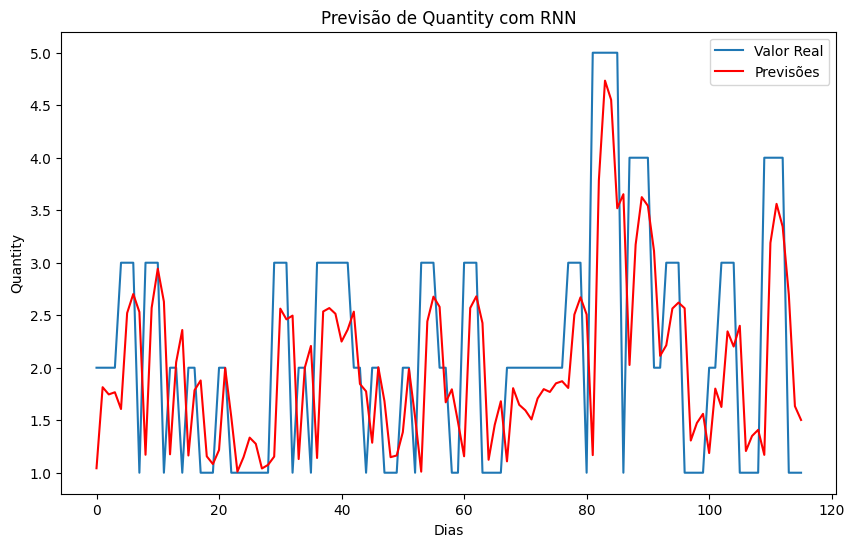

Mean Squared Error: 0.908842596231674
Root Mean Squared Error: 0.9533323639904784
Mean Absolute Error: 0.702428787946701
Mean Absolute Percentage Error: 0.4020874322659668


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt



# Escalonamento da coluna 'Quantity' (normalização para o intervalo [0, 1])
scaler = MinMaxScaler(feature_range=(0, 1))
df2_sorted['Quantity_scaled'] = scaler.fit_transform(df2_sorted[['Quantity']])

# 2. Criação de janelas de tempo
time_step = 10  # Número de passos de tempo a serem considerados para a predição

# Função para criar o dataset com janelas de tempo
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# Dividir em treino e teste
train_data, test_data = train_test_split(df2_sorted['Quantity_scaled'], test_size=0.2, shuffle=False)

# Criar datasets de treinamento e teste
X_train, y_train = create_dataset(train_data.values, time_step)
X_test, y_test = create_dataset(test_data.values, time_step)

# Reformatar para o formato esperado pelo RNN (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Adicionando a dimensão 'features'
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 3. Criação do Modelo RNN
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(time_step, 1)))  # RNN com 50 unidades
model.add(Dense(1))  # Camada de saída com 1 unidade (previsão para o próximo valor)

# 4. Compilação do Modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Treinamento do Modelo
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# 6. Realizando previsões
predictions = model.predict(X_test)

# Inversão da transformação para retornar ao valor original da 'Quantity'
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# 7. Avaliação do Modelo
# Plotando a previsão vs o valor real
plt.figure(figsize=(10,6))
plt.plot(y_test_original, label='Valor Real')
plt.plot(predictions, label='Previsões', color='red')
plt.title('Previsão de Quantity com RNN')
plt.xlabel('Dias')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# 8. Cálculo das métricas de desempenho
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_original, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, predictions)
mape = mean_absolute_percentage_error(y_test_original, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

LSTM

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0538
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0316
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0220
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0063
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0025
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.6412e-04
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0013
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.9298e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


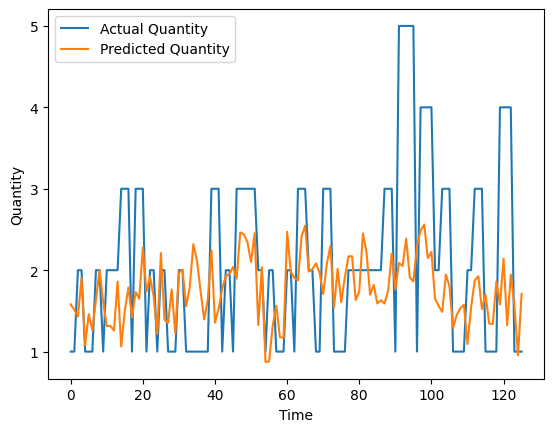

Mean Squared Error: 1.1247995628988074
Root Mean Squared Error: 1.0605656806152117
Mean Absolute Error: 0.8120203179026407
Mean Absolute Percentage Error: 0.4052409275183602


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 1. Data Preparation

# Handle categorical string columns by converting them to numeric (One-Hot Encoding)
df_encoded = pd.get_dummies(df2_sorted, drop_first=True)  # Converts strings to one-hot and drops the first category to avoid multicollinearity

# Extract all columns except 'Quantity' as features
features = df_encoded.drop('Quantity', axis=1).values

# Extract 'Quantity' as the target variable
target_variable = df_encoded['Quantity'].values

# Scale the features and the target separately
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(features)

scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler_target.fit_transform(target_variable.reshape(-1, 1))

# Split the data into train and test sets (80% train, 20% test)
train_size = int(len(scaled_target) * 0.8)
train_features, test_features = scaled_features[0:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[0:train_size], scaled_target[train_size:]

# Reshape the data to be 3D for LSTM (samples, time steps, features)
train_features = np.reshape(train_features, (train_features.shape[0], 1, train_features.shape[1]))
test_features = np.reshape(test_features, (test_features.shape[0], 1, test_features.shape[1]))

# 2. Model Building

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_features.shape[1], train_features.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer with 1 unit (predicting 'Quantity')

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 3. Model Training

# Train the model
history = model.fit(train_features, train_target, epochs=10, batch_size=32)

# 4. Prediction and Evaluation

# Predict the test set
predictions = model.predict(test_features)

# Inverse transform the predictions and the test data to get the original scale
predictions = scaler_target.inverse_transform(predictions)
test_target = scaler_target.inverse_transform(test_target)

# Plot the predictions and actual test data
plt.plot(test_target, label='Actual Quantity')
plt.plot(predictions, label='Predicted Quantity')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# 5. Evaluation Metrics
mse = mean_squared_error(test_data_original, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_original, predictions)
mape = mean_absolute_percentage_error(test_data_original, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

EXPERIMENTO 3

ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error: 1.0799807460856634
Root Mean Squared Error: 1.0392212209561849
Mean Absolute Error: 0.7877994118093652
Mean Absolute Percentage Error: 0.24015835909466038
Best (p, d, q): (1, 1, 2)


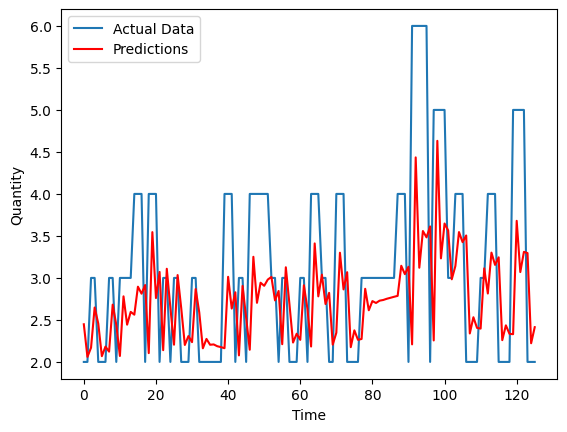

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox
import pmdarima as pm


# Dividir em treino e teste
train_data, test_data = train_test_split(df3_sorted['Quantity'], test_size=0.2, shuffle=False)

#train_data_transformed = np.log1p(train_data)  # log(1 + x) to handle 0 values
#test_data_transformed = np.log1p(test_data)

# If you want to use Box-Cox transformation instead:
train_data_transformed, lmbda = boxcox(train_data + 1)  # Adding 1 to avoid issues with zero values
test_data_transformed = boxcox(test_data + 1, lmbda)

# Initialize history with the transformed training data
history = [x for x in train_data_transformed]
predictions = []

# Automatically discover the best p, d, q values using transformed data
#auto_model = pm.auto_arima(train_data_transformed, start_p=1, start_q=1, max_p=5, max_q=5, d=0, seasonal=False, stepwise=True)
p, d, q = (1,1,2)#auto_model.order  # Extract best p, d, q parameters from Auto-ARIMA

# Perform rolling forecast
for t in range(len(test_data_transformed)):
    # Fit the ARIMA model on the rolling history
    model = ARIMA(history, order=(p, d, q))
    model_fit = model.fit()

    # Make the forecast for the next time step
    yhat = model_fit.forecast()[0]

    # Store the prediction
    predictions.append(yhat)

    # Add the true observation from test_data_transformed to history (rolling update)
    history.append(test_data_transformed[t])

# Convert predictions to a numpy array
predictions = np.array(predictions)

# Inverse the transformation (log to original scale)
#predictions = np.expm1(predictions)  # Inverse log(1+x) -> exp(x)-1
#test_data_original = np.expm1(test_data_transformed)

# If using Box-Cox:
predictions = (predictions * lmbda + 1) ** (1 / lmbda)
test_data_original = (test_data_transformed * lmbda + 1) ** (1 / lmbda)

# Evaluate the performance
mse = mean_squared_error(test_data_original, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_original, predictions)
mape = mean_absolute_percentage_error(test_data_original, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"Best (p, d, q): {p, d, q}")

# Plot predictions vs actual values
plt.plot(test_data_original, label='Actual Data')
plt.plot(predictions, label='Predictions', color='red')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.legend()
plt.show()


RNN

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0275 - val_loss: 0.0348
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - val_loss: 0.0353
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - val_loss: 0.0338
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - val_loss: 0.0340
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0229 - val_loss: 0.0333
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - val_loss: 0.0335
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 - val_loss: 0.0325
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - val_loss: 0.0328
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0188 - val_loss: 0.0320
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0176 - val_loss: 0.0323
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0200 - val_loss: 0.0323
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - val_loss: 0.0317

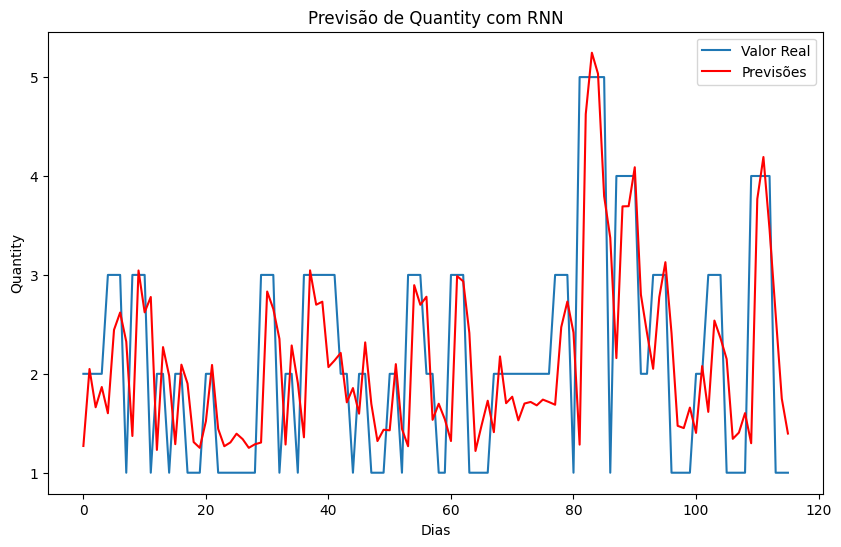

Mean Squared Error: 0.7657419451225291
Root Mean Squared Error: 0.8750668232326769
Mean Absolute Error: 0.6386634666344216
Mean Absolute Percentage Error: 0.3869933060188403


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt


# Escalonamento da coluna 'Quantity' (normalização para o intervalo [0, 1])
scaler = MinMaxScaler(feature_range=(0, 1))
df3_sorted['Quantity_scaled'] = scaler.fit_transform(df3_sorted[['Quantity']])

# 2. Criação de janelas de tempo
time_step = 10  # Número de passos de tempo a serem considerados para a predição

# Função para criar o dataset com janelas de tempo
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# Dividir em treino e teste
train_data, test_data = train_test_split(df3_sorted['Quantity_scaled'], test_size=0.2, shuffle=False)

# Criar datasets de treinamento e teste
X_train, y_train = create_dataset(train_data.values, time_step)
X_test, y_test = create_dataset(test_data.values, time_step)

# Reformatar para o formato esperado pelo RNN (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Adicionando a dimensão 'features'
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 3. Criação do Modelo RNN
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(time_step, 1)))  # RNN com 50 unidades
model.add(Dense(1))  # Camada de saída com 1 unidade (previsão para o próximo valor)

# 4. Compilação do Modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Treinamento do Modelo
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# 6. Realizando previsões
predictions = model.predict(X_test)

# Inversão da transformação para retornar ao valor original da 'Quantity'
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# 7. Avaliação do Modelo
# Plotando a previsão vs o valor real
plt.figure(figsize=(10,6))
plt.plot(y_test_original, label='Valor Real')
plt.plot(predictions, label='Previsões', color='red')
plt.title('Previsão de Quantity com RNN')
plt.xlabel('Dias')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# 8. Cálculo das métricas de desempenho
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_original, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, predictions)
mape = mean_absolute_percentage_error(y_test_original, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")



LSTM

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0514
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0371
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0351
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


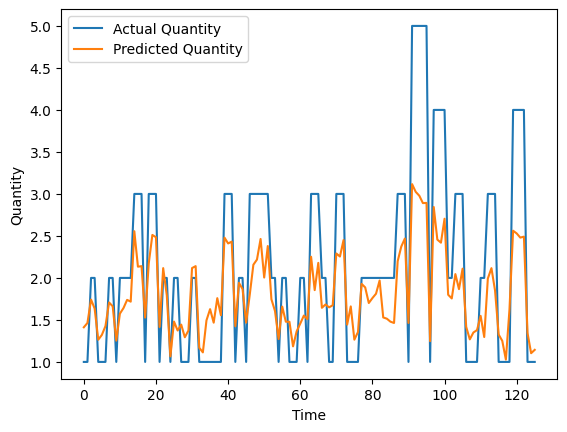

Mean Squared Error: 0.551430675654156
Root Mean Squared Error: 0.7425837835922328
Mean Absolute Error: 0.5899638713352264
Mean Absolute Percentage Error: 0.28527164935434934


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 1. Data Preparation

# Handle categorical string columns by converting them to numeric (One-Hot Encoding)
df_encoded = pd.get_dummies(df3_sorted, drop_first=True)  # Converts strings to one-hot and drops the first category to avoid multicollinearity

# Extract all columns except 'Quantity' as features
features = df_encoded.drop('Quantity', axis=1).values

# Extract 'Quantity' as the target variable
target_variable = df_encoded['Quantity'].values

# Scale the features and the target separately
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(features)

scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler_target.fit_transform(target_variable.reshape(-1, 1))

# Split the data into train and test sets (80% train, 20% test)
train_size = int(len(scaled_target) * 0.8)
train_features, test_features = scaled_features[0:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[0:train_size], scaled_target[train_size:]

# Reshape the data to be 3D for LSTM (samples, time steps, features)
train_features = np.reshape(train_features, (train_features.shape[0], 1, train_features.shape[1]))
test_features = np.reshape(test_features, (test_features.shape[0], 1, test_features.shape[1]))

# 2. Model Building

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_features.shape[1], train_features.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer with 1 unit (predicting 'Quantity')

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 3. Model Training

# Train the model
history = model.fit(train_features, train_target, epochs=10, batch_size=32)

# 4. Prediction and Evaluation

# Predict the test set
predictions = model.predict(test_features)

# Inverse transform the predictions and the test data to get the original scale
predictions = scaler_target.inverse_transform(predictions)
test_target = scaler_target.inverse_transform(test_target)

# Plot the predictions and actual test data
plt.plot(test_target, label='Actual Quantity')
plt.plot(predictions, label='Predicted Quantity')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# 5. Evaluation Metrics
mse = mean_squared_error(test_data_original, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_original, predictions)
mape = mean_absolute_percentage_error(test_data_original, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

EXPERIMENTO 4

ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error: 1.0799807460856634
Root Mean Squared Error: 1.0392212209561849
Mean Absolute Error: 0.7877994118093652
Mean Absolute Percentage Error: 0.24015835909466038
Best (p, d, q): (1, 1, 2)


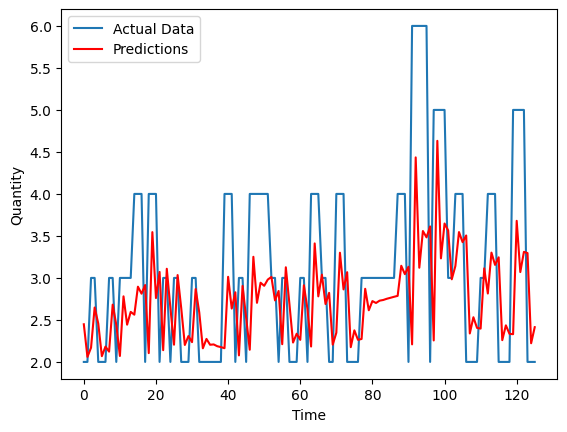

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox
import pmdarima as pm


# Dividir em treino e teste
train_data, test_data = train_test_split(df4['Quantity'], test_size=0.2, shuffle=False)

#train_data_transformed = np.log1p(train_data)  # log(1 + x) to handle 0 values
#test_data_transformed = np.log1p(test_data)

# If you want to use Box-Cox transformation instead:
train_data_transformed, lmbda = boxcox(train_data + 1)  # Adding 1 to avoid issues with zero values
test_data_transformed = boxcox(test_data + 1, lmbda)

# Initialize history with the transformed training data
history = [x for x in train_data_transformed]
predictions = []

# Automatically discover the best p, d, q values using transformed data
p, d, q = (1,0,1)#auto_model.order  # Extract best p, d, q parameters from Auto-ARIMA

# Perform rolling forecast
for t in range(len(test_data_transformed)):
    # Fit the ARIMA model on the rolling history
    model = ARIMA(history, order=(p, d, q))
    model_fit = model.fit()

    # Make the forecast for the next time step
    yhat = model_fit.forecast()[0]

    # Store the prediction
    predictions.append(yhat)

    # Add the true observation from test_data_transformed to history (rolling update)
    history.append(test_data_transformed[t])

# Convert predictions to a numpy array
predictions = np.array(predictions)

# Inverse the transformation (log to original scale)
#predictions = np.expm1(predictions)  # Inverse log(1+x) -> exp(x)-1
#test_data_original = np.expm1(test_data_transformed)

# If using Box-Cox:
predictions = (predictions * lmbda + 1) ** (1 / lmbda)
test_data_original = (test_data_transformed * lmbda + 1) ** (1 / lmbda)

# Evaluate the performance
mse = mean_squared_error(test_data_original, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_original, predictions)
mape = mean_absolute_percentage_error(test_data_original, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"Best (p, d, q): {p, d, q}")

# Plot predictions vs actual values
plt.plot(test_data_original, label='Actual Data')
plt.plot(predictions, label='Predictions', color='red')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.legend()
plt.show()


RNN

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0468 - val_loss: 0.0447
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0331 - val_loss: 0.0380
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0284 - val_loss: 0.0380
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0253 - val_loss: 0.0369
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0230 - val_loss: 0.0359
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0245 - val_loss: 0.0365
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0286 - val_loss: 0.0350
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0246 - val_loss: 0.0354
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0198 - val_loss: 0.0346
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0234 - val_loss: 0.0349
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0219 - val_loss: 0.0346
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0215 - val_loss:

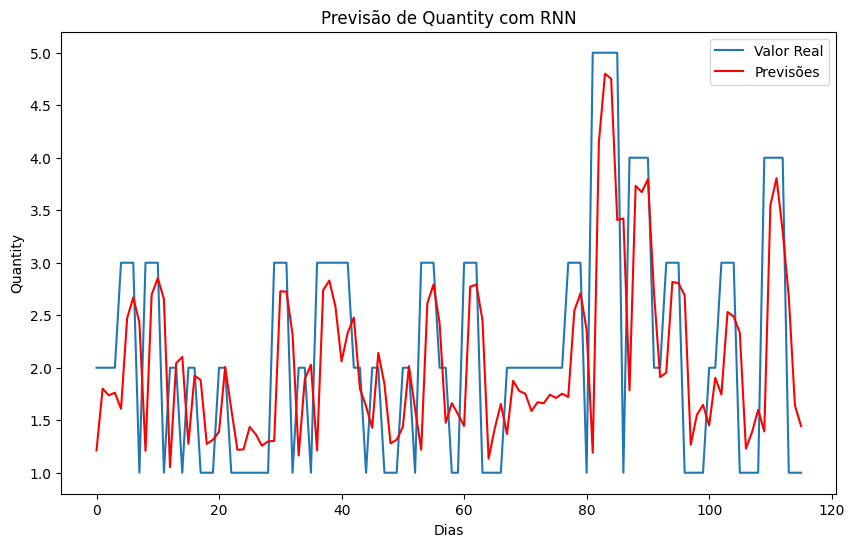

Mean Squared Error: 0.8157920421388847
Root Mean Squared Error: 0.9032120693053679
Mean Absolute Error: 0.657138214029115
Mean Absolute Percentage Error: 0.3919357615812072


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt


# Escalonamento da coluna 'Quantity' (normalização para o intervalo [0, 1])
scaler = MinMaxScaler(feature_range=(0, 1))
df4['Quantity_scaled'] = scaler.fit_transform(df4[['Quantity']])

# 2. Criação de janelas de tempo
time_step = 10  # Número de passos de tempo a serem considerados para a predição

# Função para criar o dataset com janelas de tempo
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# Dividir em treino e teste
train_data, test_data = train_test_split(df4['Quantity_scaled'], test_size=0.2, shuffle=False)

# Criar datasets de treinamento e teste
X_train, y_train = create_dataset(train_data.values, time_step)
X_test, y_test = create_dataset(test_data.values, time_step)

# Reformatar para o formato esperado pelo RNN (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Adicionando a dimensão 'features'
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 3. Criação do Modelo RNN
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(time_step, 1)))  # RNN com 50 unidades
model.add(Dense(1))  # Camada de saída com 1 unidade (previsão para o próximo valor)

# 4. Compilação do Modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Treinamento do Modelo
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# 6. Realizando previsões
predictions = model.predict(X_test)

# Inversão da transformação para retornar ao valor original da 'Quantity'
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# 7. Avaliação do Modelo
# Plotando a previsão vs o valor real
plt.figure(figsize=(10,6))
plt.plot(y_test_original, label='Valor Real')
plt.plot(predictions, label='Previsões', color='red')
plt.title('Previsão de Quantity com RNN')
plt.xlabel('Dias')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# 8. Cálculo das métricas de desempenho
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_original, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, predictions)
mape = mean_absolute_percentage_error(y_test_original, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")



LSTM

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0622
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0303
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0221
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0011
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.4696e-04
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.0969e-04
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.5345e-04
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.9388e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


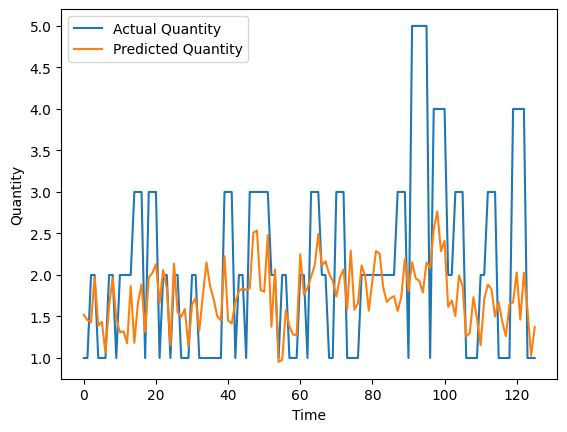

Mean Squared Error: 1.0783119707623414
Root Mean Squared Error: 1.038418013500508
Mean Absolute Error: 0.7852832296537975
Mean Absolute Percentage Error: 0.3816054259343123


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 1. Data Preparation

# Handle categorical string columns by converting them to numeric (One-Hot Encoding)
df_encoded = pd.get_dummies(df4, drop_first=True)  # Converts strings to one-hot and drops the first category to avoid multicollinearity

# Extract all columns except 'Quantity' as features
features = df_encoded.drop('Quantity', axis=1).values

# Extract 'Quantity' as the target variable
target_variable = df_encoded['Quantity'].values

# Scale the features and the target separately
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(features)

scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler_target.fit_transform(target_variable.reshape(-1, 1))

# Split the data into train and test sets (80% train, 20% test)
train_size = int(len(scaled_target) * 0.8)
train_features, test_features = scaled_features[0:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[0:train_size], scaled_target[train_size:]

# Reshape the data to be 3D for LSTM (samples, time steps, features)
train_features = np.reshape(train_features, (train_features.shape[0], 1, train_features.shape[1]))
test_features = np.reshape(test_features, (test_features.shape[0], 1, test_features.shape[1]))

# 2. Model Building

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_features.shape[1], train_features.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer with 1 unit (predicting 'Quantity')

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 3. Model Training

# Train the model
history = model.fit(train_features, train_target, epochs=10, batch_size=32)

# 4. Prediction and Evaluation

# Predict the test set
predictions = model.predict(test_features)

# Inverse transform the predictions and the test data to get the original scale
predictions = scaler_target.inverse_transform(predictions)
test_target = scaler_target.inverse_transform(test_target)

# Plot the predictions and actual test data
plt.plot(test_target, label='Actual Quantity')
plt.plot(predictions, label='Predicted Quantity')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# 5. Evaluation Metrics
mse = mean_squared_error(test_data_original, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_original, predictions)
mape = mean_absolute_percentage_error(test_data_original, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

Experimento 5

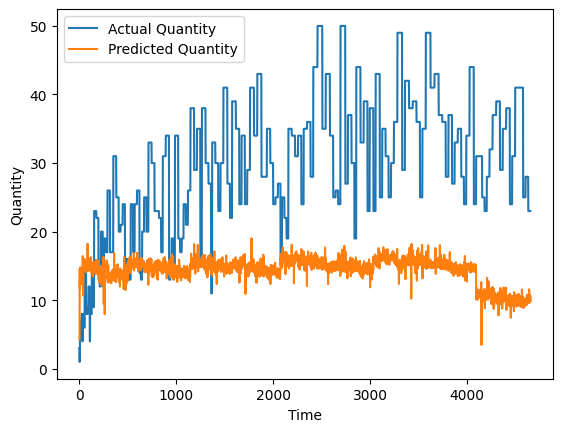

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox
import pmdarima as pm


# Dividir em treino e teste
train_data, test_data = train_test_split(df_sorted['Quantity'], test_size=0.2, shuffle=False)

#train_data_transformed = np.log1p(train_data)  # log(1 + x) to handle 0 values
#test_data_transformed = np.log1p(test_data)

# If you want to use Box-Cox transformation instead:
train_data_transformed, lmbda = boxcox(train_data + 1)  # Adding 1 to avoid issues with zero values
test_data_transformed = boxcox(test_data + 1, lmbda)

# Initialize history with the transformed training data
history = [x for x in train_data_transformed]
predictions = []

# Automatically discover the best p, d, q values using transformed data
p, d, q = (1,0,1)#auto_model.order  # Extract best p, d, q parameters from Auto-ARIMA

# Perform rolling forecast
for t in range(len(test_data_transformed)):
    # Fit the ARIMA model on the rolling history
    model = ARIMA(history, order=(p, d, q))
    model_fit = model.fit()

    # Make the forecast for the next time step
    yhat = model_fit.forecast()[0]

    # Store the prediction
    predictions.append(yhat)

    # Add the true observation from test_data_transformed to history (rolling update)
    history.append(test_data_transformed[t])

# Convert predictions to a numpy array
predictions = np.array(predictions)

# Inverse the transformation (log to original scale)
#predictions = np.expm1(predictions)  # Inverse log(1+x) -> exp(x)-1
#test_data_original = np.expm1(test_data_transformed)

# If using Box-Cox:
predictions = (predictions * lmbda + 1) ** (1 / lmbda)
test_data_original = (test_data_transformed * lmbda + 1) ** (1 / lmbda)

# Evaluate the performance
mse = mean_squared_error(test_data_original, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_original, predictions)
mape = mean_absolute_percentage_error(test_data_original, predictions)

# Plot predictions vs actual values
plt.plot(test_data_original, label='Actual Data')
plt.plot(predictions, label='Predictions', color='red')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.legend()
plt.show()


RNN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 206.8475
Epoch 2/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 72.6187
Epoch 3/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 43.0472
Epoch 4/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 28.2866
Epoch 5/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 19.0286
Epoch 6/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 13.2076
Epoch 7/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 9.8039
Epoch 8/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 8.4319
Epoch 9/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 6.6846
Epoch 10/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 5.0852
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


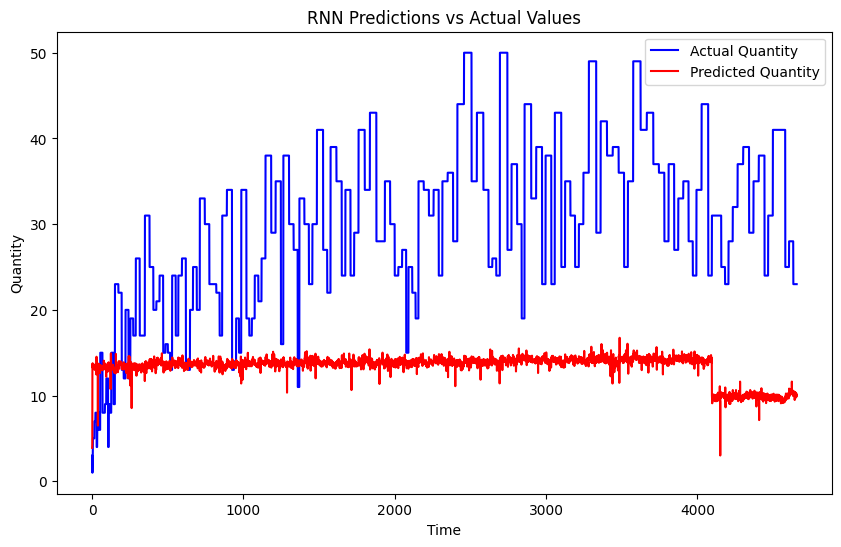

Mean Squared Error (MSE): 383.1310884147373
Root Mean Squared Error (RMSE): 19.573734656798056
Mean Absolute Error (MAE): 17.476717550969056
Mean Absolute Percentage Error (MAPE): 0.543171633421266


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

# 1. Data Preparation

# Handle categorical string columns by converting them to numeric (One-Hot Encoding)
df_encoded = pd.get_dummies(df_sorted, drop_first=True)  # Converts strings to one-hot and drops the first category

# Extract all columns except 'Quantity' as features
features = df_encoded.drop('Quantity', axis=1).values

# Extract 'Quantity' as the target variable
target_variable = df_encoded['Quantity'].values

# Scale the features only (leave target as is for test data)
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(features)

# Split the data into train and test sets (80% train, 20% test)
train_size = int(len(target_variable) * 0.8)
train_features, test_features = scaled_features[0:train_size], scaled_features[train_size:]
train_target, test_target = target_variable[0:train_size], target_variable[train_size:]

# Reshape the features to be 3D for RNN (samples, time steps, features)
train_features = np.reshape(train_features, (train_features.shape[0], 1, train_features.shape[1]))
test_features = np.reshape(test_features, (test_features.shape[0], 1, test_features.shape[1]))

# 2. Model Building

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(train_features.shape[1], train_features.shape[2])))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))  # Output layer with 1 unit (predicting 'Quantity')

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 3. Model Training

# Train the model
history = model.fit(train_features, train_target, epochs=10, batch_size=32, verbose=1)

# 4. Prediction and Evaluation

# Predict the test set
predictions = model.predict(test_features)

# Plot the predictions and actual test data
plt.figure(figsize=(10, 6))
plt.plot(test_target, label='Actual Quantity', color='blue')
plt.plot(predictions, label='Predicted Quantity', color='red')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.legend()
plt.title('RNN Predictions vs Actual Values')
plt.show()

# 5. Evaluation Metrics
mse = mean_squared_error(test_target, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_target, predictions)
mape = mean_absolute_percentage_error(test_target, predictions)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - loss: 0.0092
Epoch 2/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - loss: 4.2443e-04
Epoch 3/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - loss: 2.5778e-04
Epoch 4/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - loss: 1.8859e-04
Epoch 5/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - loss: 1.7638e-04
Epoch 6/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - loss: 1.7548e-04
Epoch 7/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - loss: 1.5854e-04
Epoch 8/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - loss: 1.6055e-04
Epoch 9/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - loss: 1.4544e-04
Epoch 10/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - loss: 1.4896e-04
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


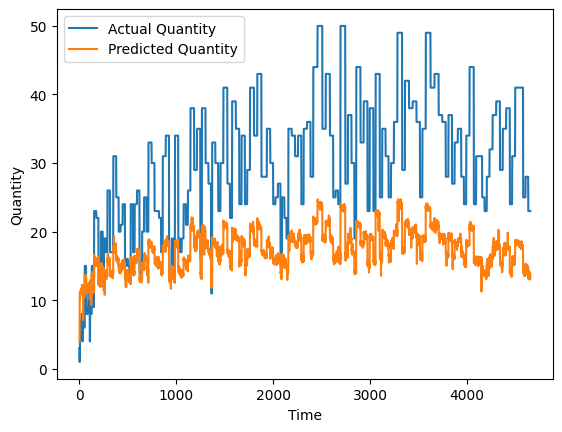

Mean Squared Error: 217.60714388802037
Root Mean Squared Error: 14.751513274509174
Mean Absolute Error: 13.302308714489632
Mean Absolute Percentage Error: 0.41477035289004344


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 1. Data Preparation

# Handle categorical string columns by converting them to numeric (One-Hot Encoding)
df_encoded = pd.get_dummies(df_sorted, drop_first=True)  # Converts strings to one-hot and drops the first category to avoid multicollinearity

# Extract all columns except 'Quantity' as features
features = df_encoded.drop('Quantity', axis=1).values

# Extract 'Quantity' as the target variable
target_variable = df_encoded['Quantity'].values

# Scale the features and the target separately
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(features)

scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler_target.fit_transform(target_variable.reshape(-1, 1))

# Split the data into train and test sets (80% train, 20% test)
train_size = int(len(scaled_target) * 0.8)
train_features, test_features = scaled_features[0:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[0:train_size], scaled_target[train_size:]

# Reshape the data to be 3D for LSTM (samples, time steps, features)
train_features = np.reshape(train_features, (train_features.shape[0], 1, train_features.shape[1]))
test_features = np.reshape(test_features, (test_features.shape[0], 1, test_features.shape[1]))

# 2. Model Building

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_features.shape[1], train_features.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer with 1 unit (predicting 'Quantity')

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 3. Model Training

# Train the model
history = model.fit(train_features, train_target, epochs=10, batch_size=32)

# 4. Prediction and Evaluation

# Predict the test set
predictions = model.predict(test_features)

# Inverse transform the predictions and the test data to get the original scale
predictions = scaler_target.inverse_transform(predictions)
test_target = scaler_target.inverse_transform(test_target)

# Plot the predictions and actual test data
plt.plot(test_target, label='Actual Quantity')
plt.plot(predictions, label='Predicted Quantity')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# 5. Evaluation Metrics
mse = mean_squared_error(test_data_original, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_original, predictions)
mape = mean_absolute_percentage_error(test_data_original, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")